# Group Project of Cmpe 256
## Team Ironwall
### Shikai Jin, Zihao Gu

# Data Analysis on the Health Nutrition And Population Statistics - Method 1
### By Shikai Jin
## 1. Introduction of the data and method
Datasource: https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics

Health Nutrition and Population Statistics database provides key health, nutrition and population statistics gathered from a variety of international and national sources. Themes include global surgery, health financing, HIV/AIDS, immunization, infectious diseases, medical resources and usage, noncommunicable diseases, nutrition, population dynamics, reproductive health, universal health coverage, and water and sanitation. 

In this section, I tried to find the correlations between different features provided by the database and find if the Life expectancy could be predict by using the existing features in the database.

## 2. Loading data
The data could be read from the csv file downloaded through the world bank website, but since the data is organized in a specific manner and all years has been put into the header, so the dataframe got from the csv would required a lot of manipulations before they could been put into use of analysis. However, the world bank also provides API to get their data directly, so in this section I would use their API to get data that is easier to handle.

In [218]:
import seaborn as sns
import wbdata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
countries = ['ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA',
       'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI',
       'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'MNP', 'NOR',
       'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'WSM', 'SMR', 'STP',
       'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN',
       'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'KNA', 'LCA', 'MAF',
       'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA',
       'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV',
       'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
       'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE']
indicators = {'NY.GNP.PCAP.CD':'A', 'SE.PRM.ENRR':'B', 'SE.TER.ENRR':'C', 'SP.URB.TOTL.IN.ZS':'D', 'SH.STA.BASS.ZS':'E',\
               'SH.XPD.CHEX.GD.ZS':'F', 'SP.DYN.IMRT.IN':'G', 'SP.DYN.LE00.IN':'H', 'SH.STA.OWAD.ZS':'I', 'SI.POV.NAHC':'J',\
                   'SL.UEM.TOTL.ZS':'K'}

list_map = {}
for k,v in indicators.items():
    indicator = {k:v}
    df = wbdata.get_dataframe(indicator, country=countries, convert_date=False)
    dfu = df.unstack(level=0)
    data_list = []
    for col in dfu.columns:
        sub_list = dfu[col].tolist()
        data_list += sub_list
    list_map[v] = data_list

corre_df = pd.DataFrame(
    list(zip(list_map['A'], list_map['B'],list_map['C'],list_map['D'],list_map['E'],list_map['F'],list_map['G'],list_map['H'],list_map['I'],list_map['J'],list_map['K'])), \
        columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
)
corre_df

,A,B,C,D,E,F,G,H,I,J,K
0,NaN,NaN,NaN,73.611,NaN,NaN,NaN,65.055,NaN,NaN,NaN
1,NaN,NaN,NaN,74.217,NaN,NaN,NaN,65.176,NaN,NaN,NaN
2,NaN,NaN,NaN,74.767,NaN,NaN,NaN,65.269,NaN,NaN,NaN
3,NaN,NaN,NaN,75.309,NaN,NaN,NaN,65.348,NaN,NaN,NaN
4,1120.0,NaN,NaN,75.844,NaN,NaN,NaN,65.426,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
12385,NaN,NaN,NaN,NaN,NaN,NaN,45.4,NaN,37.3,NaN,NaN
12386,NaN,NaN,NaN,NaN,NaN,NaN,43.1,NaN,37.7,NaN,NaN
12387,NaN,NaN,NaN,NaN,NaN,NaN,41.0,NaN,38.2,NaN,NaN
12388,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN


Although the dataset contains 404 indicator to show different perspectives of the data in the world, not all of them contains enough data for analyzing and evaluation conditions for that indication. The dataset contains a lot of NaN value in the whole dataset. Considering a lot of health, education and other data are chaning consistanly, and the data from country to country varis dramaticaly, it would be hard to fill them with medain value or other guess. I choose the indicators by going through the whole dataset to make sure that they would provide enough data convering more than 20 years in multiple countries. The indicators I choose are listed as follows:

(Since the name of the indicator is usually very long so I choose a letter for each indicator so that the plot and histgram would not be messy looking. A more detailed description of each indicator could be found in the HNP_StatsSeries.csv file.)
A - NY.GNP.PCAP.CD - GNI per capita, Atlas method (current US$)
B - SE.PRM.ENRR - School enrollment, primary (% gross)
C - SE.TER.ENRR - School enrollment, tertiary (% gross)
D - SP.URB.TOTL.IN.ZS - Urban population (% of total population)
E - SH.STA.BASS.ZS - People using at least basic sanitation services (% of population)
F - SH.XPD.CHEX.GD.ZS - Current health expenditure (% of GDP)
G - SP.DYN.IMRT.IN - Mortality rate, infant (per 1,000 live births)
H - SP.DYN.LE00.IN - Life expectancy at birth, total (years)
I - SH.STA.OWAD.ZS - Prevalence of overweight (% of adults)
J - SI.POV.NAHC - Poverty headcount ratio at national poverty lines (% of population)
K - SL.UEM.TOTL.ZS - Unemployment, total (% of total labor force) (modeled ILO estimate)



Even that, the data still has a lot of NaN containning in the datasets, I choose to keep the data with at least 8 valid numbers.

In [224]:
cleaned_df = corre_df.dropna(thresh=8)
cleaned_df

,A,B,C,D,E,F,G,H,I,J,K
31,3860.0,108.997391,38.119110,87.328,NaN,NaN,24.9,71.813,49.3,NaN,5.440
34,7620.0,110.970871,37.001331,87.960,NaN,NaN,22.4,72.453,51.1,NaN,11.760
38,8030.0,111.541656,46.960701,88.759,NaN,NaN,18.9,73.213,53.3,NaN,12.650
39,7580.0,114.496872,48.831718,88.952,NaN,NaN,18.2,73.396,53.9,NaN,14.050
40,7470.0,115.694130,53.964810,89.142,86.975309,8.466965,17.5,73.576,54.4,NaN,15.000
...,...,...,...,...,...,...,...,...,...,...,...
12293,1720.0,108.410900,25.191790,32.429,76.491721,6.335006,17.8,75.006,14.5,NaN,1.252
12294,1880.0,110.329600,30.715500,33.115,78.292184,5.783177,17.6,75.056,14.9,13.5,1.256
12295,1970.0,109.887000,29.073460,33.809,80.080312,5.652621,17.4,75.110,15.3,NaN,1.859
12296,2080.0,111.204900,28.544970,34.510,81.855704,5.659194,17.2,75.172,15.7,9.8,1.851


## 3. Correlation Analysis

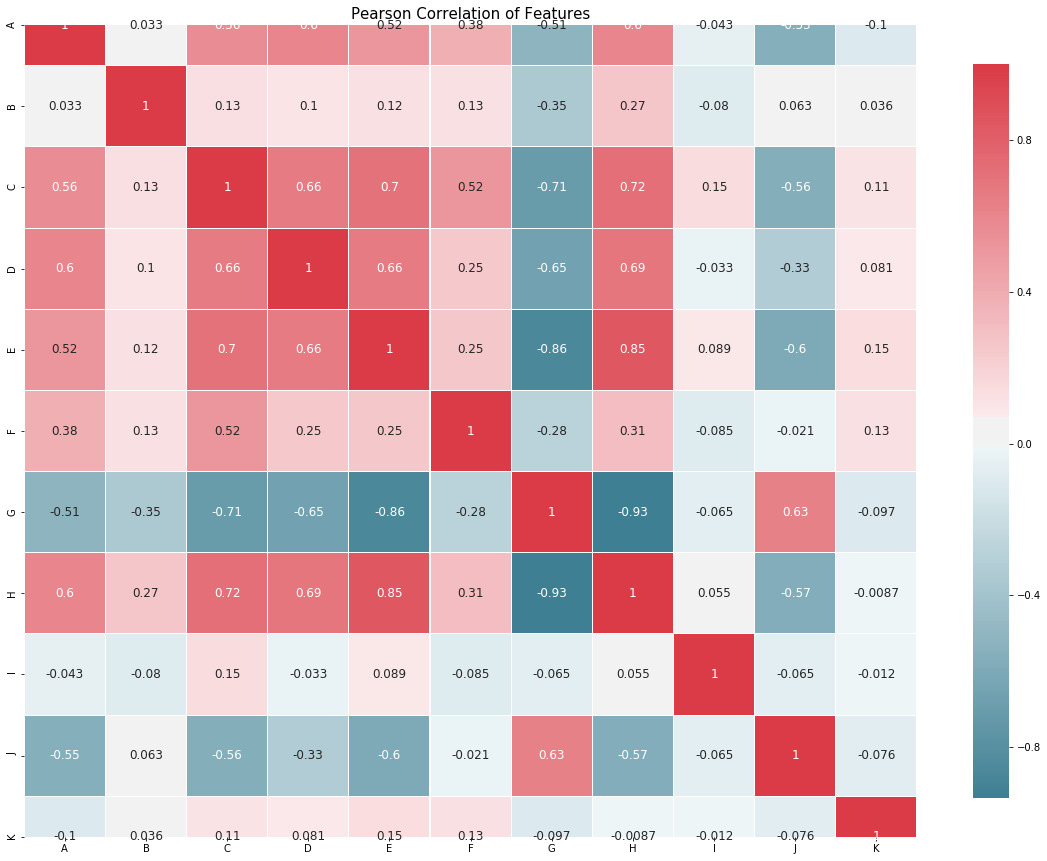

In [232]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(20, 15))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(cleaned_df)

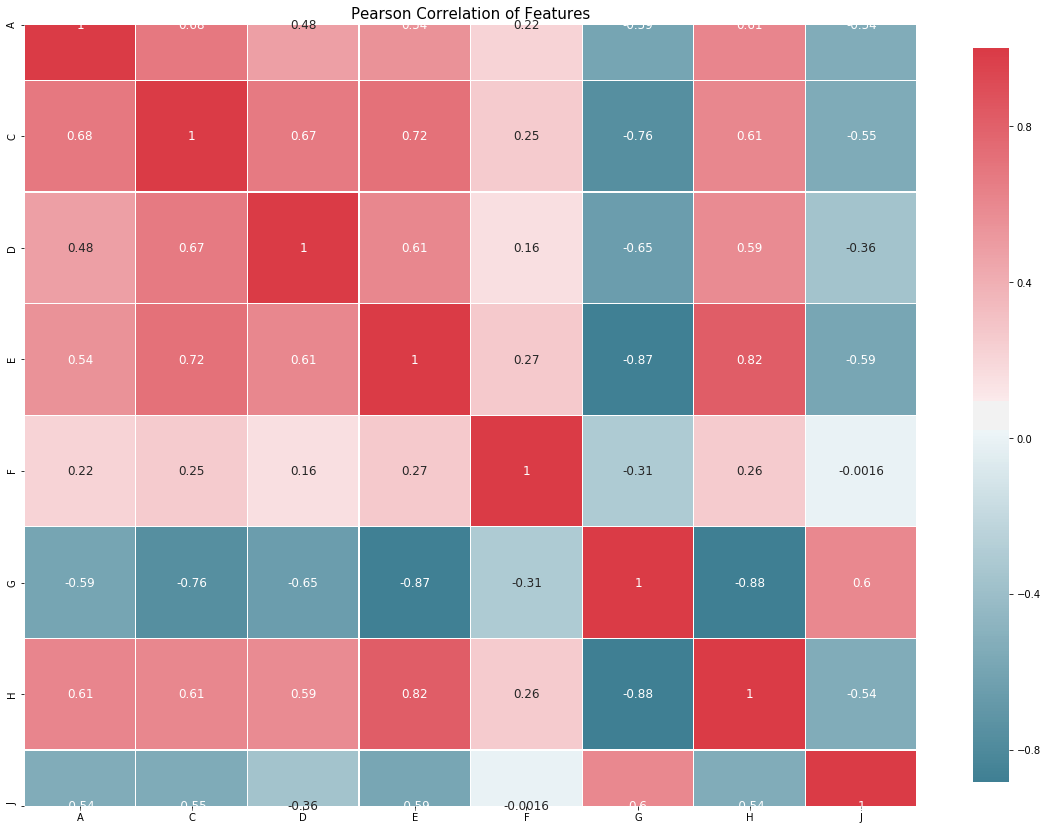

In [236]:
countries = ['ARG', 'ARM', 'ABW', 'AUS', 'AUT', 'AZE',
       'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU',
       'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA',
       'BDI', 'CPV', 'KHM', 'CMR', 'CAN', 'CYM', 'CAF', 'TCD', 'CHI',
       'CHL', 'CHN', 'COL', 'COM', 'COD', 'COG', 'CRI', 'CIV', 'HRV',
       'CUB', 'CUW', 'CYP', 'CZE', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU',
       'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'FRO', 'FJI',
       'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU', 'GHA', 'GIB',
       'GRC', 'GRL', 'GRD', 'GUM', 'GTM', 'GIN', 'GNB', 'GUY', 'HTI',
       'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL',
       'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR', 'KAZ', 'KEN', 'KIR',
       'PRK', 'KOR', 'XKX', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS',
       'MDV', 'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA',
       'MCO', 'MNG', 'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NRU', 'NPL',
       'NLD', 'NCL', 'NZL', 'NIC', 'NER', 'NGA', 'MKD', 'MNP', 'NOR',
       'OMN', 'PAK', 'PLW', 'PAN', 'PNG', 'PRY', 'PER', 'PHL', 'POL',
       'PRT', 'PRI', 'QAT', 'ROU', 'RUS', 'RWA', 'WSM', 'SMR', 'STP',
       'SAU', 'SEN', 'SRB', 'SYC', 'SLE', 'SGP', 'SXM', 'SVK', 'SVN',
       'SLB', 'SOM', 'ZAF', 'SSD', 'ESP', 'LKA', 'KNA', 'LCA', 'MAF',
       'VCT', 'SDN', 'SUR', 'SWE', 'CHE', 'SYR', 'TJK', 'TZA', 'THA',
       'TLS', 'TGO', 'TON', 'TTO', 'TUN', 'TUR', 'TKM', 'TCA', 'TUV',
       'UGA', 'UKR', 'ARE', 'GBR', 'USA', 'URY', 'UZB', 'VUT', 'VEN',
       'VNM', 'VIR', 'PSE', 'YEM', 'ZMB', 'ZWE']
indicators = {'NY.GNP.PCAP.CD':'A','SE.TER.ENRR':'C', 'SP.URB.TOTL.IN.ZS':'D', 'SH.STA.BASS.ZS':'E',\
               'SH.XPD.CHEX.GD.ZS':'F', 'SP.DYN.IMRT.IN':'G', 'SP.DYN.LE00.IN':'H', 'SI.POV.NAHC':'J'}
#df = wbdata.get_dataframe(indicators, country=countries, convert_date=False)
#df1 = df.unstack(level=0)
list_map = {}
for k,v in indicators.items():
    indicator = {k:v}
    df = wbdata.get_dataframe(indicator, country=countries, convert_date=False)
    dfu = df.unstack(level=0)
    data_list = []
    for col in dfu.columns:
        sub_list = dfu[col].tolist()
        data_list += sub_list
    list_map[v] = data_list

corre_df2 = pd.DataFrame(
    list(zip(list_map['A'],list_map['C'],list_map['D'],list_map['E'],list_map['F'],list_map['G'],list_map['H'],list_map['J'])), \
        columns = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'J']
)

cleaned_df2 = corre_df2.dropna(thresh=8)
correlation_heatmap(cleaned_df2)

## 4. Linear Regression

In [238]:
X = cleaned_df2[['A','C','D','E','F','G','J']].values
y = cleaned_df2['H'].values

In [240]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
coeff_df = pd.DataFrame(regressor.coef_, ['A','C','D','E','F','G','J'],columns=['Coefficient'])  
coeff_df

,Coefficient
A,0.000320
C,-0.092503
D,0.026504
E,0.055075
F,-0.019210
G,-0.248054
J,0.013925


In [247]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

In [248]:
df1

,Actual,Predicted
0,70.201000,68.039521
1,73.482927,74.926099
2,75.707000,73.158470
3,76.746341,75.187206
4,74.409000,73.257820
5,63.433000,64.828553
6,69.271000,68.467979
7,75.056000,70.627686
8,76.210000,74.099022
9,67.773000,62.053124


## 5. Evaluation

In [249]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.8853927208677776
Mean Squared Error: 6.395412410977011
Root Mean Squared Error: 2.528915263700429
